In [11]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_csv("Ransomware.csv",sep='|')

In [13]:
df


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [14]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [15]:
from sklearn.metrics import f1_score
import sklearn.metrics

In [16]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [17]:
# Checking the size of dataframe
from sys import getsizeof
initial_size = getsizeof(df)/(1024.0**3)
print("Size of DataFrame: {} GB".format(initial_size))

Size of DataFrame: 0.07982608210295439 GB


In [18]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [19]:
df.legitimate.value_counts() #1 means legitimate, 0 means malware

legitimate
0    96724
1    41323
Name: count, dtype: int64

In [20]:
# Converting labelled data in categories datatype
df.legitimate = df.legitimate.astype('category')
df.legitimate

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: category
Categories (2, int64): [0, 1]

In [21]:
df.md5.nunique()

138047

In [22]:
df.md5.shape[0]

138047

In [23]:
df.shape[1]

57

In [24]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [25]:
df.dtypes

Name                             object
md5                              object
Machine                           int64
SizeOfOptionalHeader              int64
Characteristics                   int64
MajorLinkerVersion                int64
MinorLinkerVersion                int64
SizeOfCode                        int64
SizeOfInitializedData             int64
SizeOfUninitializedData           int64
AddressOfEntryPoint               int64
BaseOfCode                        int64
BaseOfData                        int64
ImageBase                       float64
SectionAlignment                  int64
FileAlignment                     int64
MajorOperatingSystemVersion       int64
MinorOperatingSystemVersion       int64
MajorImageVersion                 int64
MinorImageVersion                 int64
MajorSubsystemVersion             int64
MinorSubsystemVersion             int64
SizeOfImage                       int64
SizeOfHeaders                     int64
CheckSum                          int64


In [26]:
# Using VIF to remove highly correlated columns
from statsmodels.stats.outliers_influence import variance_inflation_factor


cols_vif = df.columns.tolist()
cols_vif.remove('legitimate')
cols_vif.remove('md5')
cols_vif.remove('Name')
cols_vif


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = cols_vif

In [27]:
df = df.dropna()

In [28]:
df.drop(['Name','md5'],axis=1)

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [29]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'memtest.exe'

In [ ]:
# Using VIF to remove highly correlated columns
from statsmodels.stats.outliers_influence import variance_inflation_factor


cols_vif = df.columns.tolist()
cols_vif.remove('legitimate')
cols_vif.remove('md5')
cols_vif.remove('Name')
cols_vif


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = cols_vif

In [ ]:
df = df.dropna()

In [ ]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[cols_vif].values, i)
                          for i in range(len(cols_vif))]

print(vif_data)

In [ ]:
df.drop(['MinorImageVersion','MinorSubsystemVersion','SizeOfHeapCommit','SectionsMinRawsize','SectionsMinVirtualsize','SectionMaxVirtualsize' ],axis=1)

In [69]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [70]:
df.legitimate = df.legitimate.dropna()
df.legitimate = df.legitimate.fillna(0)

In [71]:
df.legitimate = df.legitimate.astype('int64')

In [72]:
iv, woe = iv_woe(df.drop(['Name'],axis=1), 'legitimate')

Information value of md5 is 1.240653
Information value of Machine is 2.596527
Information value of SizeOfOptionalHeader is 2.596853
Information value of Characteristics is 3.823743
Information value of MajorLinkerVersion is 2.787002
Information value of MinorLinkerVersion is 0.583745
Information value of SizeOfCode is 2.5136
Information value of SizeOfInitializedData is 3.569039
Information value of SizeOfUninitializedData is 0.328101
Information value of AddressOfEntryPoint is 2.351206
Information value of BaseOfCode is 0.031301
Information value of BaseOfData is 2.974971
Information value of ImageBase is 6.097249
Information value of SectionAlignment is 0.163236
Information value of FileAlignment is 0.153303
Information value of MajorOperatingSystemVersion is 4.34342
Information value of MinorOperatingSystemVersion is 0.475603
Information value of MajorImageVersion is 0.181241
Information value of MinorImageVersion is 0.17365
Information value of MajorSubsystemVersion is 3.566766
Inf

In [34]:
iv.sort_values(by = 'IV', ascending=False)

,Variable,IV
0,ImageBase,6.097249
0,VersionInformationSize,5.187680
0,SectionsMaxEntropy,4.978054
0,MajorOperatingSystemVersion,4.343420
0,ResourcesMinSize,4.272744
0,SizeOfStackReserve,4.161116
0,Characteristics,3.823743
0,SizeOfInitializedData,3.569039
0,MajorSubsystemVersion,3.566766
0,SectionsMinVirtualsize,3.386807


In [35]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'][:15].values.tolist()

In [36]:
features

['ImageBase',
 'VersionInformationSize',
 'SectionsMaxEntropy',
 'MajorOperatingSystemVersion',
 'ResourcesMinSize',
 'SizeOfStackReserve',
 'Characteristics',
 'SizeOfInitializedData',
 'MajorSubsystemVersion',
 'SectionsMinVirtualsize',
 'ResourcesNb',
 'Subsystem',
 'ResourcesMinEntropy',
 'BaseOfData',
 'SizeOfImage']

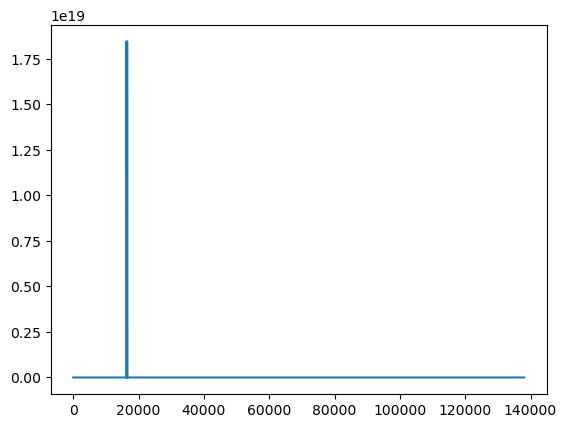

In [37]:
plt.plot(df.ImageBase)

In [38]:
X=df[features]
y=df['legitimate']

In [39]:
randomseed = 42

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

138047
Training labels shape: (92491,)
Test labels shape: (45556,)
Training features shape: (92491, 15)
Test features shape: (45556, 15)


In [42]:
from collections import Counter
#import imblearn

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
df.dtypes

Name                            object
md5                             object
Machine                          int64
SizeOfOptionalHeader             int64
Characteristics                  int64
MajorLinkerVersion               int64
MinorLinkerVersion               int64
SizeOfCode                       int64
SizeOfInitializedData            int64
SizeOfUninitializedData          int64
AddressOfEntryPoint              int64
BaseOfCode                       int64
BaseOfData                       int64
ImageBase                      float64
SectionAlignment                 int64
FileAlignment                    int64
MajorOperatingSystemVersion      int64
MinorOperatingSystemVersion      int64
MajorImageVersion                int64
MinorImageVersion                int64
MajorSubsystemVersion            int64
MinorSubsystemVersion            int64
SizeOfImage                      int64
SizeOfHeaders                    int64
CheckSum                         int64
Subsystem                

In [45]:
df.drop('md5',axis=1)

,Name,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,332,224,258,9,0,361984,115712,0,6135,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,332,224,3330,9,0,130560,19968,0,81778,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,332,224,3330,9,0,517120,621568,0,350896,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,332,224,258,9,0,585728,369152,0,451258,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,332,224,258,9,0,294912,247296,0,217381,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,123291,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,40000,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,59610,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,51216,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [46]:
"""
Before SMOTE_Tomek
"""
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

# Create the classifier object
classifier = LogisticRegression(class_weight = 'balanced')

# Train the classifier on the resampled data
classifier.fit(X_train, y_train)

# Check the new counts of the train and test sets
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

Counter({0: 64881, 1: 27610}) Counter({0: 31843, 1: 13713})
Counter({0: 64881, 1: 27610}) Counter({0: 31843, 1: 13713})


In [47]:
print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

138047
Training labels shape: (92491,)
Test labels shape: (45556,)
Training features shape: (92491, 15)
Test features shape: (45556, 15)


In [48]:
import sys
!{sys.executable} -m pip install lazypredict

In [49]:
%pip uninstall scikit-learn
%pip install scikit-learn==1.2.2

^C
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.


In [52]:
# RandomForestClassifier is best fitting in Auto-ML
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = randomseed)

In [53]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [54]:
df.drop('md5',axis=1)

,Name,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,332,224,258,9,0,361984,115712,0,6135,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,332,224,3330,9,0,130560,19968,0,81778,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,332,224,3330,9,0,517120,621568,0,350896,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,332,224,258,9,0,585728,369152,0,451258,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,332,224,258,9,0,294912,247296,0,217381,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,123291,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,40000,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,59610,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,51216,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [56]:
pred = rf.predict(X_test)

In [57]:
cm=confusion_matrix(y_test,pred)
cm

array([[31685,   158],
       [  121, 13592]], dtype=int64)

In [58]:
rf.score(X_test,y_test)

0.9938756695056633

In [62]:
kn = KNeighborsClassifier(n_neighbors=29)

In [63]:
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [64]:
pred1= kn.predict(X_test)

In [65]:
cm1 = confusion_matrix(y_test,pred1)
cm1

array([[31367,   476],
       [  412, 13301]], dtype=int64)

In [66]:
kn.score(X_test,y_test)

0.9805075072438317

([<matplotlib.patches.Wedge at 0x1ee8a822290>,
 [Text(0.6484073958497663, 0.8885763045497695, 'Legitimate'),
  Text(-0.6484073958497659, -0.8885763045497698, 'Malware')],
 [Text(0.35367676137259974, 0.4846779842998742, '30%'),
  Text(-0.35367676137259957, -0.48467798429987435, '70%')])

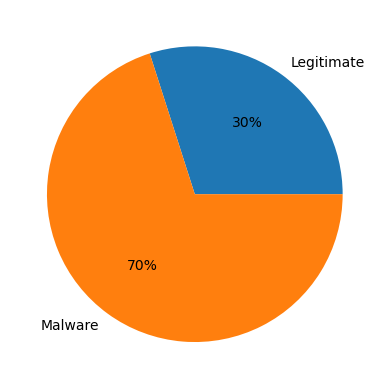

In [67]:
type_classify=['Legitimate','Malware']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

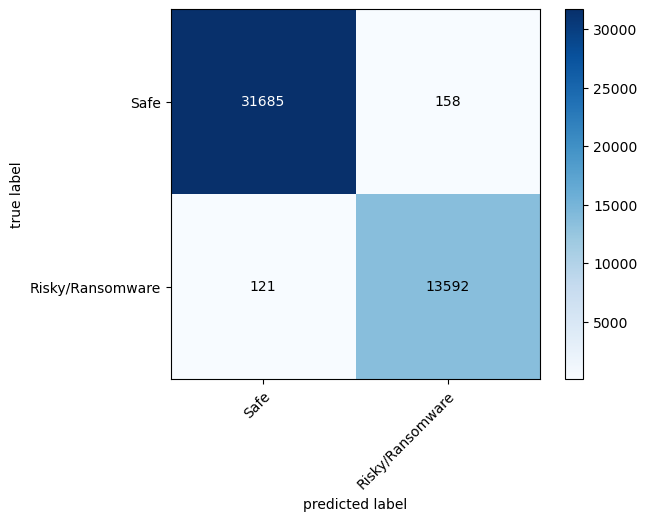

In [254]:
# Classes
classes = ['Safe', 'Risky/Ransomware']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   colorbar = True)

plt.show()

In [61]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from  sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

KNN: 0.978484 (0.000941)
Decision Tree: 0.988377 (0.001060)
Naive Bayes: 0.701517 (0.000030)
RandomForest: 0.983944 (0.000913)
LR: 0.701484 (0.000006)


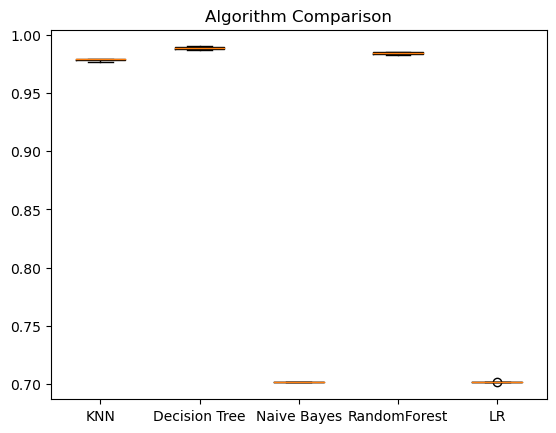

In [270]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=29)))
models.append(('Decision Tree', DecisionTreeClassifier(min_samples_leaf=30)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=80, max_depth=3,random_state=0,min_samples_leaf=9)))
models.append(("LR",LogisticRegression()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [68]:
 pip install nbconvert[webpdf]

     ---------------------------------------- 0.0/83.4 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/83.4 kB ? eta -:--:--
     -------------- ----------------------- 30.7/83.4 kB 262.6 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/83.4 kB 409.6 kB/s eta 0:00:01
     -------------------------------------- 83.4/83.4 kB 468.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/101.4 kB ? eta -:--:--
     -------------------------------------- 101.4/101.4 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
